This notebook generates figures illustrating the accumulation of predictive uncertainty in multi-step rollouts, as described in Supplementary Material Section 10.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load Llama-3.1-8B model data
data_8B = np.load('8B_10_step_token_dist.npz')
mean_avg_entropy_8B = data_8B['mean_avg_entropy_8B']
se_avg_entropy_8B = data_8B['se_avg_entropy_8B']
mean_entropies_8B = data_8B["mean_entropies_8B"]
se_entropies_8B = data_8B["se_entropies_8B"]

# Load Llama-3.2-3B model data
data_3B = np.load('3B_10_step_token_dist.npz')
mean_avg_entropy_3B = data_3B['mean_avg_entropy_3B']
se_avg_entropy_3B = data_3B['se_avg_entropy_3B']
mean_entropies_3B = data_3B["mean_entropies_3B"]
se_entropies_3B = data_3B["se_entropies_3B"]

# Load Llama-3.2-1B model data
data_1B = np.load('1B_10_step_token_dist.npz')
mean_avg_entropy_1B = data_1B['mean_avg_entropy_1B']
se_avg_entropy_1B = data_1B['se_avg_entropy_1B']
mean_entropies_1B = data_1B["mean_entropies_1B"]
se_entropies_1B = data_1B["se_entropies_1B"]

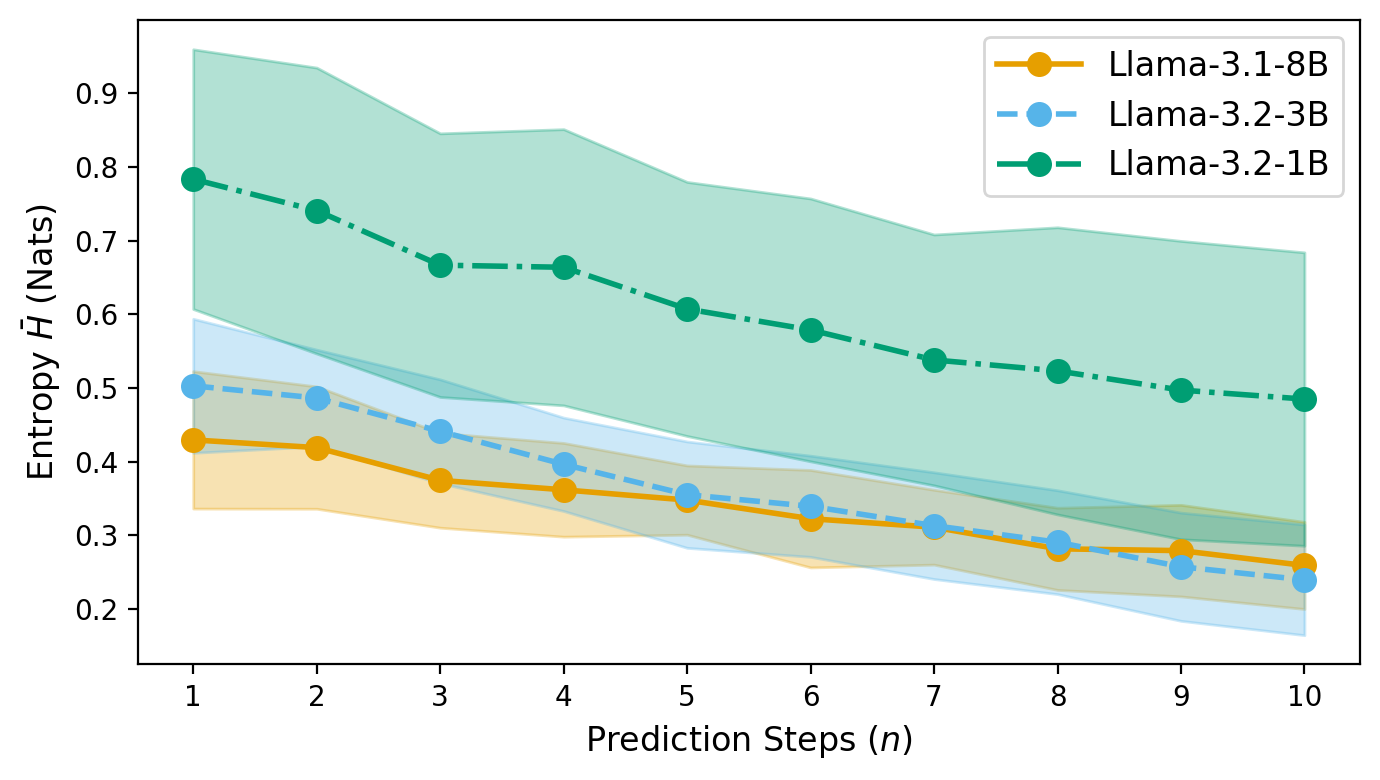

In [2]:
n_future_steps = len(mean_avg_entropy_1B)
n_seeds = 20
# t-value for 95% confidence interval
t_value = stats.t.ppf(0.975, df=n_seeds-1)
fig, ax = plt.subplots(figsize=(7, 4), dpi=200)
time_steps = np.arange(1, n_future_steps + 1)

colors = [
"#E69F00", # Llama-3.1-8B
"#56B4E9", # Llama-3.2-3B
"#009E73", # Llama-3.2-1B
]

ax.plot(time_steps, mean_avg_entropy_8B, 'o-', color=colors[0],
 linewidth=2, label='Llama-3.1-8B', markersize=8)
ax.fill_between(time_steps, mean_avg_entropy_8B - t_value * se_avg_entropy_8B,
 mean_avg_entropy_8B + t_value * se_avg_entropy_8B, color=colors[0], alpha=0.3)
ax.plot(time_steps, mean_avg_entropy_3B, 'o--', color=colors[1],
 linewidth=2, label='Llama-3.2-3B', markersize=8)
ax.fill_between(time_steps, mean_avg_entropy_3B - t_value * se_avg_entropy_3B,
 mean_avg_entropy_3B + t_value * se_avg_entropy_3B, color=colors[1], alpha=0.3)
ax.plot(time_steps, mean_avg_entropy_1B, 'o-.', color=colors[2],
 linewidth=2, label='Llama-3.2-1B', markersize=8)
ax.fill_between(time_steps, mean_avg_entropy_1B - t_value * se_avg_entropy_1B,
 mean_avg_entropy_1B + t_value * se_avg_entropy_1B, color=colors[2], alpha=0.3)
ax.set_xlabel('Prediction Steps ($n$)', fontsize=12)
ax.set_ylabel('Entropy $\\bar{H}$ (Nats)', fontsize=12)
ax.legend(loc='best', fontsize=12, handlelength=2.5)
ax.set_xticks(time_steps)
ax.set_xticklabels([str(int(step)) for step in time_steps])
ax.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.show()